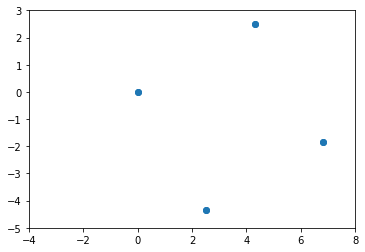

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import projections
# 3D cube coordinates in the world coordinate frame 
cube_coordinates = np.array([[0, 0, 0],[1, 0, 0],[1, 1, 0],
                             [0, 1, 0],[0, 0, 1],[1, 0, 1],
                             [1, 1, 1],[0, 1, 1],])

C = np.array([0, 1, -10])  # Xc,Yc,Zc - position of the camera
#rotation_angle = np.deg2rad(30) 
Rotation_matrix = np.array([
    [np.cos(np.deg2rad(30)), -np.sin(np.deg2rad(30)), 0],
    [np.sin(np.deg2rad(30)), np.cos(np.deg2rad(30)), 0],
    [0, 0, 1]])

f = 5  # focal length
k = np.array([[f, 0, 0],[0, f, 0], [0, 0, 1]])  

# extrinsic camera parameters
R = Rotation_matrix
projection = np.column_stack((R,-Rotation_matrix.dot(C)))  # stacking the r values with the t(after rotation)

# Projection
column_ones = np.ones(len(cube_coordinates))
Homogeneous_coordinates = np.column_stack((cube_coordinates, column_ones))  # 3D coordinates of the vertices (homogeneous)
projection_vector = projection.dot(Homogeneous_coordinates.T)
coordinates = k.dot(projection_vector).T  # retrieving 2D coordinates in the image plane
x = coordinates[:, 0]
y = coordinates[:, 1]
# results 

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(x, y)
ax.set_xlim(-4, 8)
ax.set_ylim(-5, 3)
plt.show()


In [2]:
x


array([2.5       , 6.83012702, 4.33012702, 0.        , 2.5       ,
       6.83012702, 4.33012702, 0.        ])

In [3]:
y

array([-4.33012702, -1.83012702,  2.5       ,  0.        , -4.33012702,
       -1.83012702,  2.5       ,  0.        ])